In [1]:
import numpy as np
import os

In [2]:
import statsmodels.api as sm
from tqdm.notebook import tqdm #
from itertools import combinations
from operator import itemgetter

def forward_step_select(df, predictors, response, max_features=8):
    """
    Regresses response onto predictors using a forward step algorithm. Features are added based on minimum RSS.
    
    PARAMETERS
    -----------
    df : dataframe containing predictors and responses
    predictors : list of all possible model predictors
    response : list[variable] to regress onto predictors in df
    max_features : maximum number of features to use from predictors list
    
    RETURNS
    --------
    list of models with increasing number of features upto max_features
    
    """
    
    def process_linear_model(features):
        """
        Constructs Linear Model Regression of response onto features.
        """
        # Create design Matrix
        X = sm.add_constant(df[features])
        y = df[response]

        model = sm.OLS(y,X).fit()
        RSS = model.ssr
        return (model, RSS)

    def update_model(best_features, remaining_features):
        """
        Computes the RSS of possible new models and returns the model with the lowest RSS.
        """
        results = []
        
        for feature in remaining_features:
            results.append(process_linear_model(best_features + [feature]))
            
        # select model with the lowest RSS
        new_model = sorted(results, key= itemgetter(1)).pop(0)[0]
        new_features = list(new_model.params.index)[1:]
        
        return new_features, new_model
    
    # Create list to hold models, model features and the remaining features to test
    models = []
    best_features = []
    remaining_features = predictors
    
    while remaining_features and len(best_features) < max_features:
        
        # get the best new feature set from update_model
        new_features, new_model = update_model(best_features, remaining_features)
        # update the best features to include the one we just found
        best_features = new_features  
        # reduce the available features for the next round
        remaining_features =  [feature for feature in predictors if feature not in best_features]
        
        # append the new_features and model so we can compare models with different features later
        models.append((new_features,new_model))
        
    return models

## Load the Dataset

In [6]:
def read_connectivity(connectivity_file):
    lines=connectivity_file.readlines()
    connectivity=[]
    for i in range(len(lines)):
        line0=lines[i].split()
        connectivity.append([float(i) for i in line0])
    return connectivity

In [7]:
def read_feature(connectivity_file):
    lines=connectivity_file.readlines()
    feature=[]
    for i in range(len(lines)):
        line0=lines[i].split()
        feature.append(float(line0[0]))
    return feature

In [9]:
## Load the data in Control Group

In [11]:
### Control Connectivity

control_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//controls//'

control_connectivity=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='con000'+str(i)
    if i>=10:
        sub_folder_name='con00'+str(i)
    file_list=os.listdir(control_folder+sub_folder_name)
    connectivity_file=open(control_folder+sub_folder_name+'//'+file_list[0], "r")
    aa=read_connectivity(connectivity_file)
    control_connectivity.append(aa)
    #print(file_list[0])


control_connectivity=np.array([np.array(x) for x in control_connectivity])

In [12]:
control_connectivity.shape

(47, 90, 90)

In [13]:
### Control Surface

control_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//controls//'

control_surface=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='con000'+str(i)
    if i>=10:
        sub_folder_name='con00'+str(i)
    file_list=os.listdir(control_folder+sub_folder_name)
    surface_file=open(control_folder+sub_folder_name+'//'+file_list[3], "r")
    aa=read_feature(surface_file)
    control_surface.append(aa)
    #print(file_list[3])

In [14]:
np.asarray(control_surface).shape

(47, 90)

In [15]:
### Control voxel

control_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//controls//'

control_voxel=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='con000'+str(i)
    if i>=10:
        sub_folder_name='con00'+str(i)
    file_list=os.listdir(control_folder+sub_folder_name)
    voxel_file=open(control_folder+sub_folder_name+'//'+file_list[4], "r")
    aa=read_feature(voxel_file)
    control_voxel.append(aa)
    #print(file_list[4])

In [16]:
np.asarray(control_voxel).shape

(47, 90)

In [14]:
#-------------------------------------------------------------------------------------------------------

In [17]:
## Load the data in Patient Group

In [18]:
### Patient Connectivity

patient_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//patients//'

patient_connectivity=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='Pa000'+str(i)
    if i>=10:
        sub_folder_name='Pa00'+str(i)
    file_list=os.listdir(patient_folder+sub_folder_name)
    connectivity_file=open(patient_folder+sub_folder_name+'//'+file_list[0], "r")
    aa=read_connectivity(connectivity_file)
    patient_connectivity.append(aa)
    #print(file_list[0])

In [19]:
patient_connectivity=np.array([np.array(x) for x in patient_connectivity])
patient_connectivity.shape

(47, 90, 90)

In [20]:
### Patient Surface

patient_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//patients//'

patient_surface=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='Pa000'+str(i)
    if i>=10:
        sub_folder_name='Pa00'+str(i)
    file_list=os.listdir(patient_folder+sub_folder_name)
    surface_file=open(patient_folder+sub_folder_name+'//'+file_list[3], "r")
    aa=read_feature(surface_file)
    patient_surface.append(aa)
    #print(file_list[3])

In [21]:
np.asarray(patient_surface).shape

(47, 90)

In [22]:
### patient voxel

patient_folder='C://Users//vaynexie//Desktop//StatsML_Project//networld_all//patients//'

patient_voxel=[]

for i in range(1,48):
    if i<10:
        sub_folder_name='Pa000'+str(i)
    if i>=10:
        sub_folder_name='Pa00'+str(i)
    file_list=os.listdir(patient_folder+sub_folder_name)
    voxel_file=open(patient_folder+sub_folder_name+'//'+file_list[4], "r")
    aa=read_feature(voxel_file)
    patient_voxel.append(aa)
    #print(file_list[4])

In [23]:
np.asarray(patient_voxel).shape

(47, 90)

## Baseline model built by all connectivity

In [24]:
connectivity_whole=[]

for i in control_connectivity:
    connectivity_whole.append(np.reshape(i, -1))

for i in patient_connectivity:
    connectivity_whole.append(np.reshape(i, -1))

In [25]:
connectivity_whole=np.asarray(connectivity_whole)
connectivity_whole.shape

(94, 8100)

In [26]:
import numpy as np, pandas as pd

df = pd.DataFrame(np.vstack(connectivity_whole))

gt_label=47*[0]+47*[1]
gt_label=np.asarray(gt_label)

In [27]:
X = df
y = gt_label


In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.0,0.000000,0.396376,0.000000,0.000000,0.0,0.409999,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.469850,0.0,0.368833,0.0,0.0
1,0.0,0.000000,0.427164,0.000000,0.000000,0.0,0.428012,0.000000,0.0,0.0,...,0.0,0.487196,0.0,0.000000,0.0,0.417766,0.0,0.378705,0.0,0.0
2,0.0,0.000000,0.451962,0.563337,0.000000,0.0,0.443025,0.000000,0.0,0.0,...,0.0,0.510467,0.0,0.520584,0.0,0.438374,0.0,0.379326,0.0,0.0
3,0.0,0.000000,0.445426,0.593148,0.000000,0.0,0.430173,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.332086,0.0,0.413488,0.0,0.369253,0.0,0.0
4,0.0,0.584488,0.445157,0.570030,0.000000,0.0,0.475270,0.556641,0.0,0.0,...,0.0,0.535403,0.0,0.541753,0.0,0.450240,0.0,0.401418,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.0,0.000000,0.456178,0.511331,0.000000,0.0,0.435922,0.000000,0.0,0.0,...,0.0,0.483063,0.0,0.480819,0.0,0.390341,0.0,0.395008,0.0,0.0
90,0.0,0.000000,0.405453,0.000000,0.000000,0.0,0.411020,0.000000,0.0,0.0,...,0.0,0.489196,0.0,0.000000,0.0,0.385482,0.0,0.280242,0.0,0.0
91,0.0,0.587971,0.394801,0.567621,0.548609,0.0,0.474516,0.000000,0.0,0.0,...,0.0,0.419636,0.0,0.000000,0.0,0.404497,0.0,0.329443,0.0,0.0
92,0.0,0.000000,0.353682,0.552925,0.000000,0.0,0.419825,0.513770,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.384091,0.0,0.334550,0.0,0.0


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

In [30]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=2500)#,penalty=None)
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_regression=cv_results 
print(cv_results_regression)

{'fit_time': array([0.12466693, 0.08776617, 0.07332945, 0.08078408, 0.10073113]), 'score_time': array([0.04188728, 0.0482645 , 0.04487991, 0.0478723 , 0.04986596]), 'test_accuracy': array([0.52631579, 0.36842105, 0.47368421, 0.52631579, 0.61111111]), 'test_precision': array([0.5       , 0.33333333, 0.5       , 0.57142857, 0.6       ]), 'test_recall': array([0.66666667, 0.33333333, 0.6       , 0.4       , 0.66666667]), 'test_f1': array([0.57142857, 0.33333333, 0.54545455, 0.47058824, 0.63157895])}


In [31]:
print('acc')
print(np.mean(cv_results_regression['test_accuracy']))
print(np.var(cv_results_regression['test_accuracy']))
print('pre')
print(np.mean(cv_results_regression['test_precision']))
print(np.var(cv_results_regression['test_precision']))
print('recall')
print(np.mean(cv_results_regression['test_recall']))
print(np.var(cv_results_regression['test_recall']))
print('f1')
print(np.mean(cv_results_regression['test_f1']))
print(np.var(cv_results_regression['test_f1']))


acc
0.5011695906432748
0.006345884203686608
pre
0.5009523809523809
0.008575056689342404
recall
0.5333333333333333
0.01955555555555555
f1
0.5104767265757978
0.010515039318311884


In [32]:
## SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
#clf = svm.SVC(kernel='sigmoid', C=1)

In [33]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_svm=cv_results

print('acc')
print(np.mean(cv_results_svm['test_accuracy']))
print(np.var(cv_results_svm['test_accuracy']))
print('pre')
print(np.mean(cv_results_svm['test_precision']))
print(np.var(cv_results_svm['test_precision']))
print('recall')
print(np.mean(cv_results_svm['test_recall']))
print(np.var(cv_results_svm['test_recall']))
print('f1')
print(np.mean(cv_results_svm['test_f1']))
print(np.var(cv_results_svm['test_f1']))


acc
0.5111111111111111
0.011020142949967515
pre
0.578575225943647
0.048300730238109574
recall
0.5
0.08523456790123458
f1
0.46730158730158733
0.028872360796170327


## Baseline model built by Surface Size

In [34]:


surface_whole=[]

for i in control_surface:
    surface_whole.append(np.reshape(i, -1))

for i in patient_surface:
    surface_whole.append(np.reshape(i, -1))
    
surface_whole=np.asarray(surface_whole)
print(surface_whole.shape)

import numpy as np, pandas as pd

df = pd.DataFrame(np.vstack(surface_whole))

gt_label=47*[0]+47*[1]
gt_label=np.asarray(gt_label)

X = df
y = gt_label

(94, 90)


In [35]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=2500)#,penalty=None)
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_regression=cv_results 
print(cv_results_regression)

{'fit_time': array([0.05889988, 0.05285859, 0.05784535, 0.05186057, 0.04089069]), 'score_time': array([0.00296474, 0.00299144, 0.00299215, 0.00302267, 0.00299931]), 'test_accuracy': array([0.52631579, 0.36842105, 0.57894737, 0.42105263, 0.44444444]), 'test_precision': array([0.5       , 0.36363636, 0.66666667, 0.42857143, 0.46153846]), 'test_recall': array([0.55555556, 0.44444444, 0.4       , 0.3       , 0.66666667]), 'test_f1': array([0.52631579, 0.4       , 0.5       , 0.35294118, 0.54545455])}


In [36]:
print('acc')
print(np.mean(cv_results_regression['test_accuracy']))
print(np.var(cv_results_regression['test_accuracy']))
print('pre')
print(np.mean(cv_results_regression['test_precision']))
print(np.var(cv_results_regression['test_precision']))
print('recall')
print(np.mean(cv_results_regression['test_recall']))
print(np.var(cv_results_regression['test_recall']))
print('f1')
print(np.mean(cv_results_regression['test_f1']))
print(np.var(cv_results_regression['test_f1']))


acc
0.4678362573099415
0.00567696043226976
pre
0.4840825840825841
0.010337465841961345
recall
0.47333333333333333
0.01607901234567901
f1
0.4649423022797635
0.00564794464174799


In [37]:
## SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
#clf = svm.SVC(kernel='sigmoid', C=1)

In [38]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_svm=cv_results

print('acc')
print(np.mean(cv_results_svm['test_accuracy']))
print(np.var(cv_results_svm['test_accuracy']))
print('pre')
print(np.mean(cv_results_svm['test_precision']))
print(np.var(cv_results_svm['test_precision']))
print('recall')
print(np.mean(cv_results_svm['test_recall']))
print(np.var(cv_results_svm['test_recall']))
print('f1')
print(np.mean(cv_results_svm['test_f1']))
print(np.var(cv_results_svm['test_f1']))


acc
0.6485380116959064
0.01198454225231695
pre
0.6148717948717948
0.009152925706771864
recall
0.7822222222222222
0.01489382716049383
f1
0.687241819964932
0.010788789655557521


## Surface Size with Feature Selection

In [39]:
df_add_gt=df
df_add_gt['gt'] = y

In [40]:
df_add_gt

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,gt
0,433.0,436.0,250.0,355.0,115.0,147.0,275.0,259.0,83.0,134.0,...,330.0,179.0,184.0,458.0,378.0,86.0,168.0,418.0,274.0,0
1,286.0,340.0,167.0,177.0,96.0,58.0,252.0,249.0,75.0,47.0,...,303.0,159.0,106.0,238.0,285.0,107.0,146.0,230.0,238.0,0
2,416.0,449.0,304.0,284.0,78.0,68.0,285.0,287.0,41.0,90.0,...,310.0,151.0,178.0,296.0,411.0,84.0,155.0,206.0,297.0,0
3,360.0,352.0,329.0,239.0,139.0,104.0,388.0,333.0,129.0,82.0,...,340.0,120.0,97.0,361.0,318.0,54.0,79.0,236.0,329.0,0
4,415.0,509.0,458.0,546.0,145.0,174.0,445.0,497.0,107.0,95.0,...,508.0,228.0,230.0,517.0,483.0,115.0,169.0,323.0,370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,397.0,368.0,230.0,306.0,144.0,123.0,370.0,293.0,99.0,52.0,...,380.0,146.0,144.0,425.0,386.0,89.0,108.0,316.0,338.0,1
90,287.0,309.0,222.0,274.0,111.0,79.0,241.0,283.0,80.0,37.0,...,197.0,152.0,77.0,299.0,191.0,74.0,97.0,177.0,167.0,1
91,434.0,406.0,227.0,371.0,173.0,154.0,266.0,320.0,124.0,82.0,...,248.0,193.0,171.0,318.0,305.0,90.0,94.0,249.0,267.0,1
92,358.0,283.0,120.0,181.0,81.0,97.0,278.0,280.0,71.0,59.0,...,260.0,134.0,133.0,288.0,289.0,75.0,113.0,209.0,251.0,1


In [41]:
predictors = list(df.columns)
predictors.remove('gt')
models = forward_step_select(df,predictors,['gt'],max_features=30)#len(predictors))

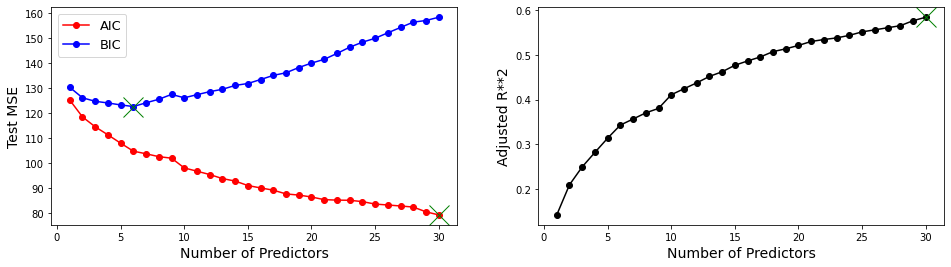

In [42]:
import matplotlib.pyplot as plt
aics = [models[x][1].aic for x in range(len(models))]
bics = [models[x][1].bic for x in range(len(models))]
r_adj = [models[x][1].rsquared_adj for x in range(len(models))]

# find the mins/maxes
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

num_predictors = np.linspace(1,len(models),len(models))
# Create a plot
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
# Add test MSE estimates
ax1.plot(num_predictors, aics, 'r', marker='o', label='AIC');
ax1.plot(num_predictors, bics, 'b', marker='o', label='BIC')

# add the minimums to the axis
ax1.plot(min_aic_index+1, min_aic, 'gx', markersize=20, markeredgewidth=1)
ax1.plot(min_bic_index+1, min_bic, 'gx', markersize=20, markeredgewidth=1)

# Labels and Legend
ax1.set_xlabel('Number of Predictors',fontsize = 14.0);
ax1.set_ylabel('Test MSE',fontsize = 14.0);
ax1.legend(loc='best',prop={'size': 13});

# Add Adj R**2
ax2.plot(num_predictors, r_adj,'k', marker='o')
ax2.plot(max_radj_index+1, max_radj, 'gx', markersize=20, markeredgewidth=1)
ax2.set_xlabel('Number of Predictors',fontsize = 14.0);
ax2.set_ylabel('Adjusted R**2',fontsize = 14.0);

In [43]:
print(min_aic_index)
print(min_bic_index)
print(max_radj_index)

29
5
29


In [44]:
selected_index=models[5][0]
surface_whole_select=[]
for i in surface_whole:
    surface_whole_select.append(i[selected_index])
    
import numpy as np, pandas as pd

df_select = pd.DataFrame(np.vstack(surface_whole_select))
df_select.columns =selected_index

X = df_select
y = gt_label

In [45]:
selected_index

[67, 53, 54, 31, 71, 29]

In [46]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=2500,)

In [47]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_regression=cv_results 

print('acc')
print(np.mean(cv_results_regression['test_accuracy']))
print(np.var(cv_results_regression['test_accuracy']))
print('pre')
print(np.mean(cv_results_regression['test_precision']))
print(np.var(cv_results_regression['test_precision']))
print('recall')
print(np.mean(cv_results_regression['test_recall']))
print(np.var(cv_results_regression['test_recall']))
print('f1')
print(np.mean(cv_results_regression['test_f1']))
print(np.var(cv_results_regression['test_f1']))


acc
0.776608187134503
0.0026319209329366284
pre
0.8109090909090909
0.00999669421487603
recall
0.7733333333333333
0.03602962962962962
f1
0.7627067669172932
0.00941276499519475


In [48]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X,y)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

print("R2:", clf.score(X,y))

lm=clf

classes:  [0 1]
coefficients:  [[-0.0151838   0.02051    -0.00911638  0.01963512  0.01555169 -0.01334279]]
intercept : [4.07065094]
R2: 0.8404255319148937


In [49]:
from scipy import stats
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)


import math
#
beta=['NA'] +list( (np.sqrt(3)/math.pi)*(lm.coef_[0])*list(X.std()) )
# newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

# for i in ts_b:

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"],myDF3['Standardized Coefficient'] = [params,sd_b,ts_b,p_values,beta]
myDF3.index=['intercept']+selected_index
print(myDF3)

           Coefficients  Standard Errors  t values  Probabilities  \
intercept        4.0707            0.263    15.474            0.0   
67              -0.0152            0.001   -25.210            0.0   
53               0.0205            0.001    17.981            0.0   
54              -0.0091            0.001   -15.632            0.0   
31               0.0196            0.001    17.374            0.0   
71               0.0156            0.001    14.434            0.0   
29              -0.0133            0.001   -13.721            0.0   

          Standardized Coefficient  
intercept                       NA  
67                       -0.842003  
53                        0.467107  
54                       -0.437117  
31                        0.599708  
71                        0.369165  
29                       -0.404338  


## Baseline model built by Voxel Size

In [51]:
voxel_whole=[]

for i in control_voxel:
    voxel_whole.append(np.reshape(i, -1))

for i in patient_voxel:
    voxel_whole.append(np.reshape(i, -1))
    
voxel_whole=np.asarray(voxel_whole)
print(voxel_whole.shape)

import numpy as np, pandas as pd

df = pd.DataFrame(np.vstack(voxel_whole))

gt_label=47*[0]+47*[1]
gt_label=np.asarray(gt_label)

X = df
y = gt_label

(94, 90)


In [52]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=2500)
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_regression=cv_results 
print(cv_results_regression)

{'fit_time': array([0.08377528, 0.09773684, 0.0957458 , 0.09326386, 0.083776  ]), 'score_time': array([0.00299239, 0.00398922, 0.00299215, 0.00299215, 0.00299191]), 'test_accuracy': array([0.31578947, 0.47368421, 0.26315789, 0.42105263, 0.33333333]), 'test_precision': array([0.33333333, 0.44444444, 0.16666667, 0.46153846, 0.33333333]), 'test_recall': array([0.44444444, 0.44444444, 0.1       , 0.6       , 0.33333333]), 'test_f1': array([0.38095238, 0.44444444, 0.125     , 0.52173913, 0.33333333])}


In [53]:
print('acc')
print(np.mean(cv_results_regression['test_accuracy']))
print(np.var(cv_results_regression['test_accuracy']))
print('pre')
print(np.mean(cv_results_regression['test_precision']))
print(np.var(cv_results_regression['test_precision']))
print('recall')
print(np.mean(cv_results_regression['test_recall']))
print(np.var(cv_results_regression['test_recall']))
print('f1')
print(np.mean(cv_results_regression['test_f1']))
print(np.var(cv_results_regression['test_f1']))


acc
0.3614035087719298
0.005737149892274545
pre
0.34786324786324785
0.011100883921396744
recall
0.3844444444444444
0.02743703703703703
f1
0.3610938578329882
0.01793190825304427


In [54]:
## SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
#clf = svm.SVC(kernel='sigmoid', C=1)

In [55]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_svm=cv_results

print('acc')
print(np.mean(cv_results_svm['test_accuracy']))
print(np.var(cv_results_svm['test_accuracy']))
print('pre')
print(np.mean(cv_results_svm['test_precision']))
print(np.var(cv_results_svm['test_precision']))
print('recall')
print(np.mean(cv_results_svm['test_recall']))
print(np.var(cv_results_svm['test_recall']))
print('f1')
print(np.mean(cv_results_svm['test_f1']))
print(np.var(cv_results_svm['test_f1']))


acc
0.5543859649122806
0.010907971683594956
pre
0.55
0.009999999999999997
recall
0.7444444444444444
0.022419753086419754
f1
0.6240259740259739
0.00756151496411236


## Voxel Size with Feature Selection

In [56]:
df_add_gt=df
df_add_gt['gt'] = y

In [57]:
predictors = list(df.columns)
predictors.remove('gt')
models = forward_step_select(df,predictors,['gt'],max_features=30) #len(predictors))

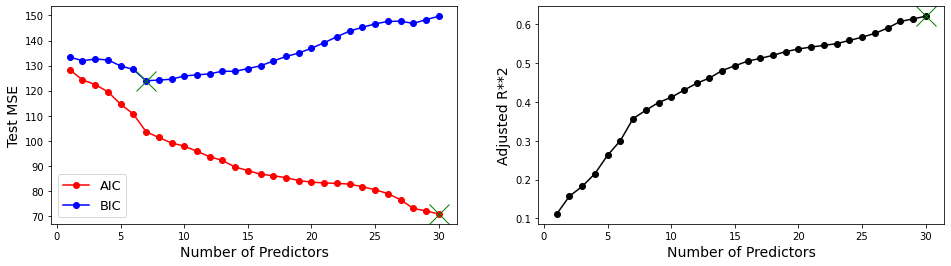

In [58]:
import matplotlib.pyplot as plt
aics = [models[x][1].aic for x in range(len(models))]
bics = [models[x][1].bic for x in range(len(models))]
r_adj = [models[x][1].rsquared_adj for x in range(len(models))]

# find the mins/maxes
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

num_predictors = np.linspace(1,len(models),len(models))
# Create a plot
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
# Add test MSE estimates
ax1.plot(num_predictors, aics, 'r', marker='o', label='AIC');
ax1.plot(num_predictors, bics, 'b', marker='o', label='BIC')

# add the minimums to the axis
ax1.plot(min_aic_index+1, min_aic, 'gx', markersize=20, markeredgewidth=1)
ax1.plot(min_bic_index+1, min_bic, 'gx', markersize=20, markeredgewidth=1)

# Labels and Legend
ax1.set_xlabel('Number of Predictors',fontsize = 14.0);
ax1.set_ylabel('Test MSE',fontsize = 14.0);
ax1.legend(loc=3,prop={'size': 13});

# Add Adj R**2
ax2.plot(num_predictors, r_adj,'k', marker='o')
ax2.plot(max_radj_index+1, max_radj, 'gx', markersize=20, markeredgewidth=1)
ax2.set_xlabel('Number of Predictors',fontsize = 14.0);
ax2.set_ylabel('Adjusted R**2',fontsize = 14.0);

In [59]:
print(min_aic_index)
print(min_bic_index)
print(max_radj_index)

29
6
29


In [60]:
selected_index

[67, 53, 54, 31, 71, 29]

In [61]:
######################
selected_index=models[6][0]
######################

voxel_whole_select=[]
for i in voxel_whole:
    voxel_whole_select.append(i[selected_index])
    
import numpy as np, pandas as pd

df_select = pd.DataFrame(np.vstack(voxel_whole_select))
df_select.columns =selected_index

X = df_select
y = gt_label

In [62]:
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=2500,)

In [63]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
cv_results_regression=cv_results 

print('acc')
print(np.mean(cv_results_regression['test_accuracy']))
print(np.var(cv_results_regression['test_accuracy']))
print('pre')
print(np.mean(cv_results_regression['test_precision']))
print(np.var(cv_results_regression['test_precision']))
print('recall')
print(np.mean(cv_results_regression['test_recall']))
print(np.var(cv_results_regression['test_recall']))
print('f1')
print(np.mean(cv_results_regression['test_f1']))
print(np.var(cv_results_regression['test_f1']))


acc
0.7766081871345029
0.0015238876919394003
pre
0.7694083694083694
0.00449550129203809
recall
0.8088888888888889
0.010637037037037039
f1
0.7811779448621554
0.0018868248315023182


In [64]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X,y)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

print("R2:", clf.score(X,y))

lm=clf

classes:  [0 1]
coefficients:  [[-0.00227403  0.0073501  -0.00145298  0.00232418 -0.00065964  0.00501485
  -0.00547232]]
intercept : [1.11625612e-05]
R2: 0.776595744680851


In [65]:
from scipy import stats
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

# newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

beta=['NA'] +list( (np.sqrt(3)/math.pi)*(lm.coef_[0])*list(X.std()) )
# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

# for i in ts_b:

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
#myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"],myDF3['Standardized Coefficient'] = [params,sd_b,ts_b,p_values,beta]
myDF3.index=['intercept']+selected_index
print(myDF3)

           Coefficients  Standard Errors  t values  Probabilities  \
intercept        0.0000            0.546     0.000            1.0   
73              -0.0023            0.000    -8.870            0.0   
77               0.0074            0.000    22.938            0.0   
17              -0.0015            0.000   -13.020            0.0   
53               0.0023            0.000    17.368            0.0   
85              -0.0007            0.000   -10.388            0.0   
4                0.0050            0.000    19.652            0.0   
5               -0.0055            0.000   -16.981            0.0   

          Standardized Coefficient  
intercept                       NA  
73                       -0.320852  
77                        0.839391  
17                       -0.442475  
53                         0.56355  
85                       -0.430291  
4                         0.836525  
5                        -0.806361  
